In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from utils.predictiveNet import PredictiveNet
from utils.agent import RandomActionAgent
import itertools
import torch
import random
from utils.env import make_env
from utils.general import saveFig
from utils.figures import TrainingFigure
import matplotlib.pyplot as plt
from analysis.SpatialTuningAnalysis import SpatialTuningAnalysis
from analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis
from analysis.DiffusionReplayAnalysis import DiffusionReplayAnalysis



In [4]:
savefolder = 'Figures/S16_SeqReplay/'

In [5]:
#Example Net
seed=102
netname = 'thRNN_5win'
#netname_1mask = 'thRNN_1win'
#exseed = 8
#netfolder = '/multisteptest/'
exseed = seed
netfolder = '/maskedk_panel/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname+'-SpeedHD-s'+str(exseed))

Net Loaded from pathname


In [6]:
env = predictiveNet.EnvLibrary[0]
agentname = 'RandomActionAgent'
action_probability = np.array([0.15,0.15,0.6,0.1,0,0,0])
agent = RandomActionAgent(env.action_space,action_probability)
place_fields, SI, decoder = predictiveNet.calculateSpatialRepresentation(env,agent,
                                             trainDecoder=True, trainHDDecoder=True)

/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Training Decoder on cuda...
loss: 5.839540 [    0\ 5000]
loss: 0.634328 [  500\ 5000]
loss: 0.416392 [ 1000\ 5000]
loss: 0.318969 [ 1500\ 5000]
loss: 0.256523 [ 2000\ 5000]
loss: 0.217248 [ 2500\ 5000]
loss: 0.188426 [ 3000\ 5000]
loss: 0.161963 [ 3500\ 5000]
loss: 0.143043 [ 4000\ 5000]
loss: 0.130408 [ 4500\ 5000]
loss: 0.119769 [ 4999\ 5000]
Training Complete. Back to the cpu
Training Decoder on cuda...
loss: 1.430363 [    0\ 5000]
loss: 0.016138 [  500\ 5000]
loss: 0.007221 [ 1000\ 5000]
loss: 0.004633 [ 1500\ 5000]
loss: 0.003414 [ 2000\ 5000]
loss: 0.002588 [ 2500\ 5000]
loss: 0.002025 [ 3000\ 5000]
loss: 0.001600 [ 3500\ 5000]
loss: 0.001272 [ 4000\ 5000]
loss: 0.001010 [ 4500\ 5000]
loss: 0.000811 [ 4999\ 5000]
Training Complete. Back to the cpu


In [7]:
minStd = 0.03
numStds=10
numtrials = 30
dtmax = 25
timesteps_sleep = 2000
DRA = DiffusionReplayAnalysis(predictiveNet, decoder = decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = 0.1, num_trials = numtrials,
                             dtmax = dtmax,timesteps_sleep=timesteps_sleep)
DRA.runSTDPanel(minStd=minStd, numStds = numStds)


setting zero-values to min (0.01)
0
setting zero-values to min (0.01)
1
setting zero-values to min (0.01)
2
setting zero-values to min (0.01)
3
4
5
6
7
8
9


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/DiffusionReplayAnalysis.py:265: RuntimeWarning: divide by zero encountered in log10
  mean_msd = np.mean(np.log10(msd),axis=0, where=msd>0)
/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/DiffusionReplayAnalysis.py:266: RuntimeWarning: divide by zero encountered in log10
  std_msd = np.nanstd(np.log10(msd), where=msd>0)


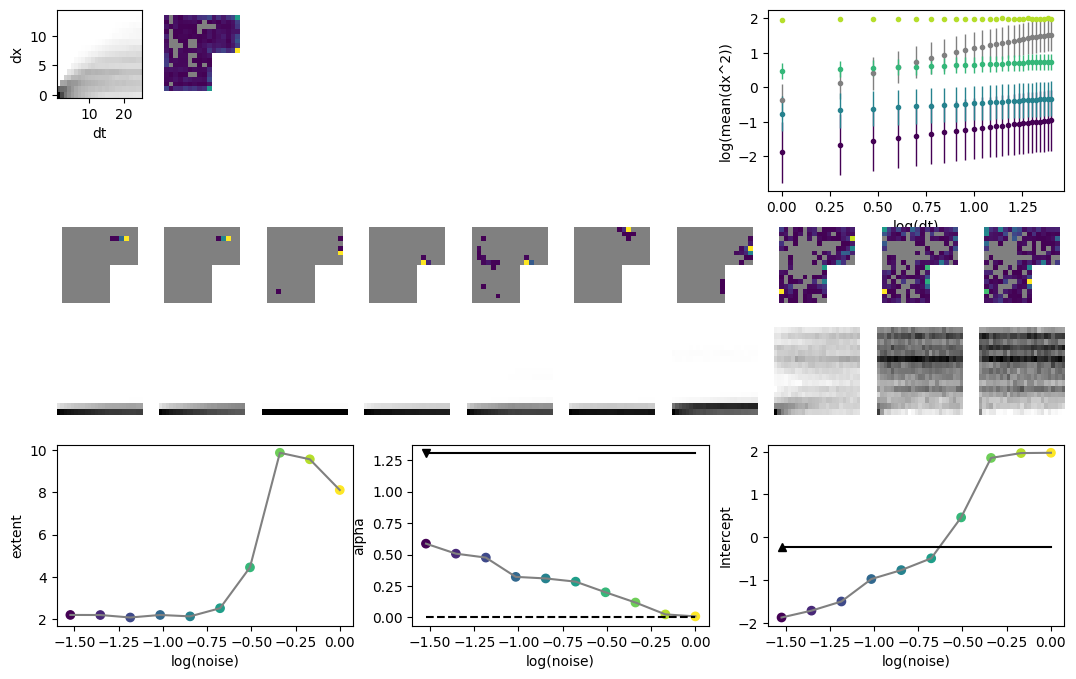

In [8]:
DRA.STDPanelFigure(netname,savefolder)

0
1
2
3
4
5
6
7
8
9


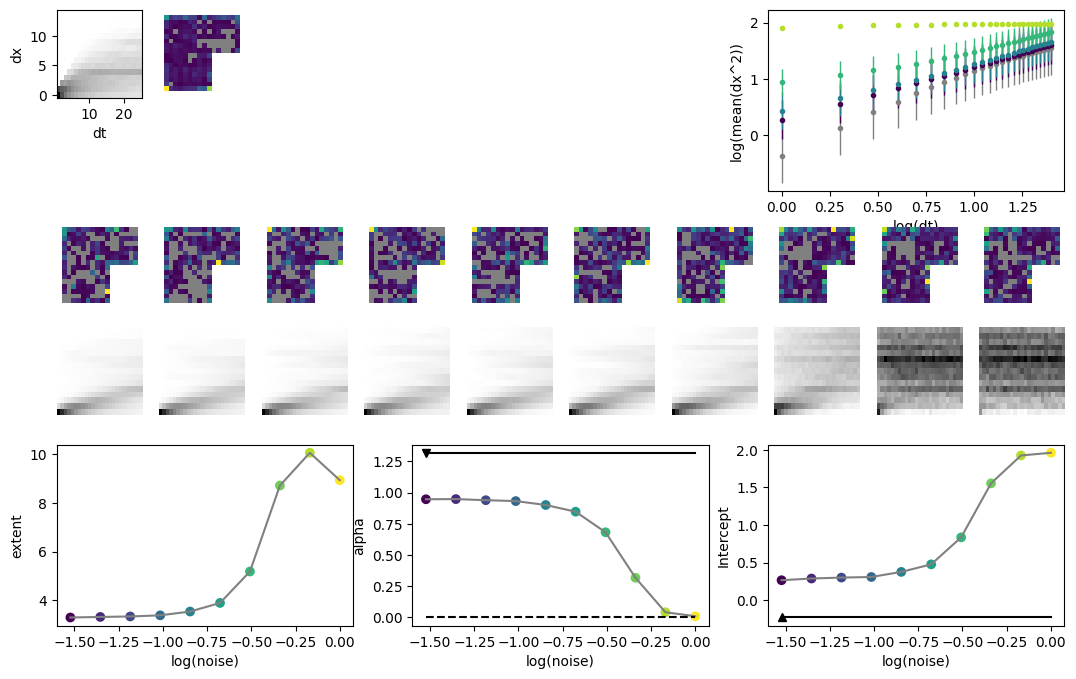

In [9]:
b_adapt = 1
tau_adapt=100

minStd = 0.03
numStds=10
DRA_adapt = DiffusionReplayAnalysis(predictiveNet, decoder = decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = 0.1,
                               withAdapt=True,
                                    b_adapt = b_adapt, tau_adapt=tau_adapt,
                                    num_trials = numtrials,
                             dtmax = dtmax, timesteps_sleep=timesteps_sleep)
DRA_adapt.runSTDPanel(minStd=minStd, numStds = numStds)
DRA_adapt.STDPanelFigure(netname+'adapt',savefolder)

Running SLEEP
Running WAKE


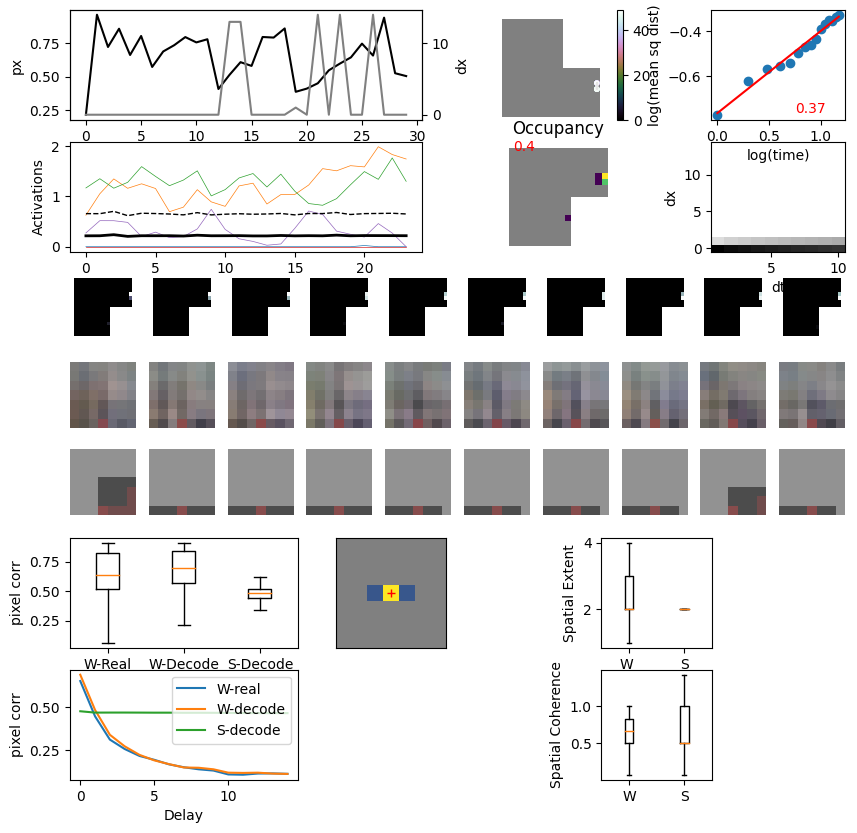

Running SLEEP
Running WAKE


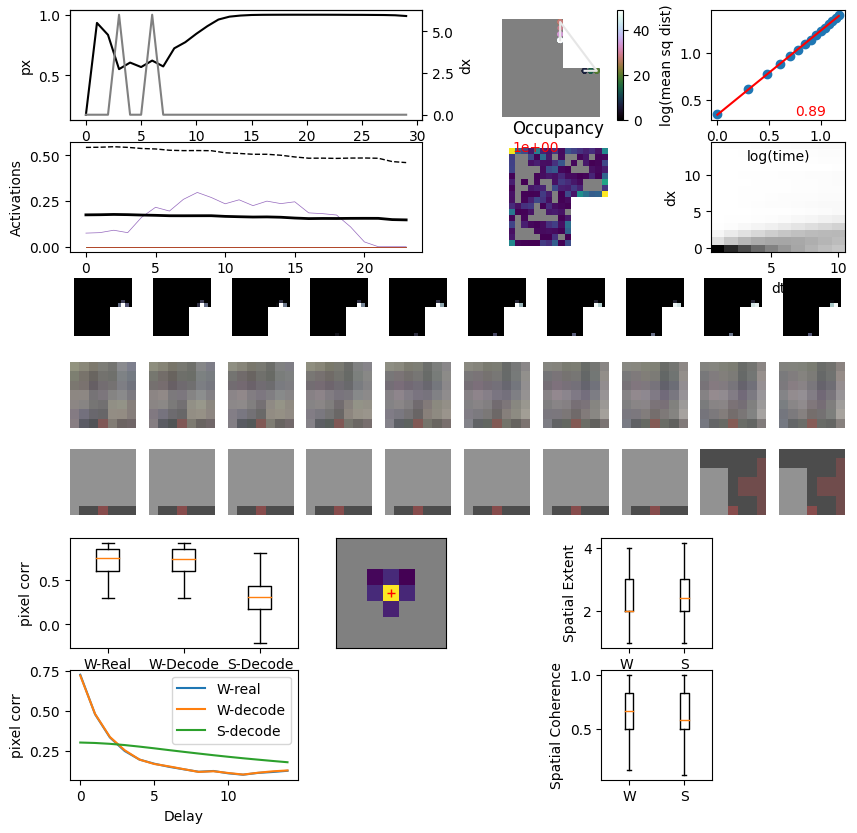

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


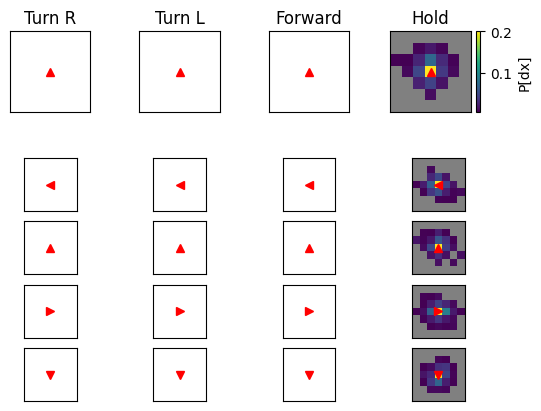

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


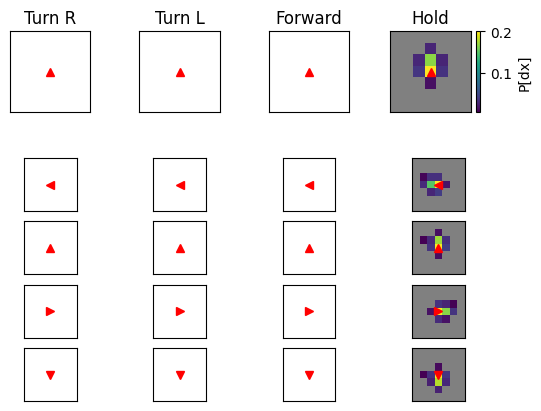

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


In [ ]:
basenoise = 0.03
plusnoise= 0.2
timesteps_sleep = 10000
OTA = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=plusnoise,
                               withIsomap=False, decoder=decoder, calculateViewSimilarity=True,
                               compareWake=True, timesteps_sleep=timesteps_sleep)
OTA.SpontTrajectoryFigure(netname+'noise',savefolder,trajRange = (100,150))


OTA_adapt = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=basenoise,
                                   withIsomap=False, decoder=OTA.decoder, 
                                      withAdapt=True, b_adapt = b_adapt, tau_adapt=tau_adapt,
                                      calculateViewSimilarity=True,
                                       compareWake=True, timesteps_sleep=timesteps_sleep)
OTA_adapt.SpontTrajectoryFigure(netname+'adapt',savefolder,trajRange = (100,150))


OTA_noiseHD = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=plusnoise,
                                   withIsomap=False, decoder=OTA.decoder, 
                                      actionAgent='HDOnly',
                                      withAdapt=False, 
                                      calculateViewSimilarity=True,
                                       compareWake=True, timesteps_sleep=timesteps_sleep)
OTA_noiseHD.transitionProbabilityFigure(netname+'noiseHD',savefolder)

OTA_adaptHD = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=basenoise,
                                   withIsomap=False, decoder=OTA.decoder, 
                                      actionAgent='HDOnly',
                                      withAdapt=True, b_adapt = b_adapt, tau_adapt=tau_adapt,
                                      calculateViewSimilarity=True,
                                       compareWake=True, timesteps_sleep=timesteps_sleep)
OTA_adaptHD.transitionProbabilityFigure(netname+'adaptHD',savefolder)


OTA_query = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=basenoise,
                               withIsomap=False, decoder=OTA.decoder,
                              actionAgent=True, calculateViewSimilarity=True,
                               compareWake=True, timesteps_sleep=timesteps_sleep)
OTA_query.transitionProbabilityFigure(netname+'query',savefolder)


In [ ]:
OTA.SpontTrajectoryFigure(netname+'noise',savefolder,trajRange = (100,150))
OTA_adapt.SpontTrajectoryFigure(netname+'adapt',savefolder,trajRange = (100,150))
OTA_noiseHD.transitionProbabilityFigure(netname+'noiseHD',savefolder)
OTA_adaptHD.transitionProbabilityFigure(netname+'adaptHD',savefolder)
OTA_query.transitionProbabilityFigure(netname+'query',savefolder)
